<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install pyxirr -qq
!pip install yfinance==0.2.59 -qq
!pip install ta -qq

In [22]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2026-02-15 22:02:16
-------------------
qualified stocks: 86
with latest results: 26
still star stocks: 15
-------------------
Initial Investment:  1.30 C
CY Investment:  1.57 C
Reserve:  1.81 L
Current:  1.39 C
-------------------
Today PnL: -2.18 L (-1.54%)
Current PnL: -32.47 L (-20.71%)
CY Booked + Current PnL: -16.79 L (-10.71%)
-------------------
Total profit:  1.27 L
Total loss:  -33.74 L
-------------------
Total Booked + Current PnL: 10.19 L (7.85%)
Total Booked PnL: 42.66 L (32.86%)
Curr Year Booked PnL: 15.68 L (11.3%)
Prev Year Booked PnL: 26.98 L (20.78%)
Est FTT:  2.37 C
Est FTT PnL: 97.84 L (70.49%)
Deployed:  1.30 C
Current:  1.39 C
CAGR/XIRR %: 3.44%


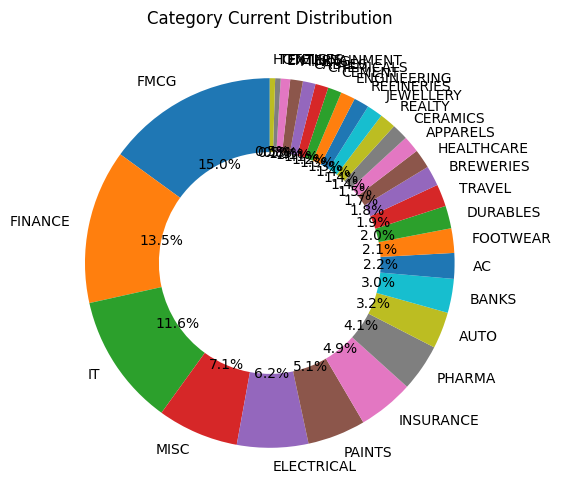

In [23]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'FTT Amt', 'Current P/L', 'Current', 'FTT', 'Dev%_PE', 'RSI_14','Conviction', 'Spread%',  'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [24]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,FTT,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
50,MASFIN,-0.09,2.80,18.25,21.57,18382.0,2745.0,100725.0,397.04,-11.47,61.0,H-SC,3.65,167.0,0.15,0.74,46.99,XR,ATH,FINANCE
77,TTKPRESTIG,-2.36,-26.71,36.56,0.09,27005.0,-26913.0,73864.0,770.00,71.40,41.0,M-SC,8.78,250.0,-1.00,0.54,1.66,OX40N,NTT,DURABLES
18,COALINDIA,-2.43,0.57,18.55,19.23,28068.0,852.0,151312.0,484.83,20.52,41.0,L-LC,11.78,185.0,0.03,1.10,19.97,XY25,ATH,MINING
36,ICICIGI,-0.19,1.50,17.58,19.34,35706.0,2998.0,203107.0,2252.93,-14.68,57.0,X-MC,3.27,66.0,0.08,1.48,17.67,X40,ATH,INSURANCE
51,MEDANTA,-0.83,-4.89,30.45,24.08,36767.0,-6205.0,120745.0,1486.00,-5.52,52.0,X-SC,11.72,87.0,-0.17,0.88,10.59,XY24,NTT,HEALTHCARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,ACC,-2.05,-31.20,138.59,64.15,226886.0,-74241.0,163710.0,3906.00,-48.05,38.0,X-SC,7.93,85.0,-0.33,1.20,0.07,XY24,BTT,CEMENT
60,REPCOHOME,-2.06,-12.77,117.61,89.82,293930.0,-36586.0,249919.0,880.00,-56.78,49.0,H-SC,1.35,161.0,-0.12,1.82,32.86,XY24,NTT,FINANCE
8,AWL,-2.29,-34.67,140.61,57.19,299582.0,-113068.0,213059.0,485.00,-62.60,25.0,X-SC,17.42,81.0,-0.38,1.56,0.00,XY24,NTT,FMCG
11,BANDHANBNK,-2.42,-20.42,141.78,92.42,314312.0,-56869.0,221690.0,400.00,90.37,66.0,H-SC,8.10,174.0,-0.18,1.62,28.12,XY24,NTT,BANKS


In [25]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,FTT,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
2,ABBOTINDIA,-0.75,-11.24,33.01,18.07,52407.0,-20095.0,158760.0,35195.00,-24.45,35.0,X-MC,10.13,58.0,-0.38,1.16,0.00,X40,ATH,PHARMA
3,ACC,-2.05,-31.20,138.59,64.15,226886.0,-74241.0,163710.0,3906.00,-48.05,38.0,X-SC,7.93,85.0,-0.33,1.20,0.07,XY24,BTT,CEMENT
5,ANGELONE,-1.95,10.50,12.40,24.20,41824.0,32038.0,337288.0,3033.00,60.44,56.0,X-SC,3.92,97.0,0.77,2.46,41.26,X40N,NTT,FINANCE
6,ASIANPAINT,-1.83,-17.29,46.22,20.95,96250.0,-43525.0,208243.0,3460.25,-14.14,28.0,X-LC,7.17,30.0,-0.45,1.52,12.19,X40,ATH,PAINTS
8,AWL,-2.29,-34.67,140.61,57.19,299582.0,-113068.0,213059.0,485.00,-62.60,25.0,X-SC,17.42,81.0,-0.38,1.56,0.00,XY24,NTT,FMCG
9,BAJAJHFL,-1.22,-23.51,103.27,55.47,192165.0,-57206.0,186080.0,181.50,-34.29,39.0,X-MC,17.86,60.0,-0.30,1.36,1.44,X40N,ATH,FINANCE
10,BAJAJHLDNG,-1.44,-2.71,32.81,29.22,60691.0,-5148.0,184977.0,14451.52,-9.98,48.0,X-LC,13.56,28.0,-0.08,1.35,3.04,X40,ATH,FINANCE
12,BATAINDIA,-3.57,-45.02,145.94,35.20,103234.0,-57933.0,70737.0,2096.00,-7.29,39.0,X-SC,21.05,91.0,-0.56,0.52,0.52,X40,NTT,FOOTWEAR
13,BERGEPAINT,0.27,-17.70,47.19,21.14,88297.0,-40229.0,187110.0,680.00,-19.50,30.0,X-MC,11.05,68.0,-0.46,1.37,0.76,XY24,NTT,PAINTS
16,CAMS,-1.28,-5.52,31.75,24.48,75548.0,-13910.0,237946.0,950.00,-9.40,48.0,X-SC,6.66,89.0,-0.18,1.74,16.92,X40N,NTT,MISC


In [26]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,FTT,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
0,5PAISA,-2.34,-38.42,83.34,12.90,112138.0,-83941.0,134555.0,593.00,98.32,40.0,H-SC,5.64,170.0,-0.75,0.98,11.88,OX40N,NTT,FINANCE
17,CERA,-1.54,-33.16,85.36,23.89,100359.0,-58332.0,117571.0,9475.00,-35.56,48.0,H-SC,15.34,153.0,-0.58,0.86,4.90,OX40N,NTT,CERAMICS
26,FINCABLES,-1.01,2.69,102.46,107.91,155350.0,3976.0,151620.0,1641.55,-7.66,64.0,M-SC,9.98,220.0,0.03,1.11,14.07,OX40N,ATH,CABLES
40,INDIGOPNTS,-2.44,-30.87,44.69,0.02,53925.0,-53895.0,120664.0,1408.00,84.15,28.0,M-SC,7.45,222.0,-1.00,0.88,4.96,OX40N,NTT,PAINTS
45,JCHAC,1.56,-38.50,62.59,-0.01,49193.0,-49209.0,78596.0,2282.00,15986.96,51.0,M-SC,17.08,231.0,-1.00,0.57,8.97,OX40N,BTT,AC
48,KANSAINER,-1.18,-33.24,69.97,13.47,125965.0,-89640.0,180027.0,340.00,-42.69,24.0,H-SC,8.05,162.0,-0.71,1.31,0.00,XY24,NTT,PAINTS
55,RAJESHEXPO,-3.64,-65.63,191.14,0.07,90121.0,-90028.0,47149.0,518.00,1628.54,51.0,L-SC,8.85,268.0,-1.00,0.34,17.26,OX40N,NTT,JEWELLERY
63,SFL,-1.35,-42.62,120.68,26.63,181582.0,-111752.0,150466.0,1287.00,14.01,54.0,M-SC,14.50,242.0,-0.62,1.10,15.50,XY24,NTT,MISC
66,SIS,-3.82,-24.82,61.30,21.26,51170.0,-27558.0,83474.0,528.00,1968.39,46.0,H-SC,4.05,168.0,-0.54,0.61,15.08,OX40N,NTT,MISC
70,SYMPHONY,-6.10,-32.84,48.86,-0.03,56156.0,-56208.0,114933.0,1306.00,-46.08,43.0,M-SC,10.38,205.0,-1.00,0.84,6.21,OX40N,NTT,DURABLES


In [27]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,FTT,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
3,ACC,-2.05,-31.20,138.59,64.15,226886.0,-74241.0,163710.0,3906.00,-48.05,38.0,X-SC,7.93,85.0,-0.33,1.20,0.07,XY24,BTT,CEMENT
7,ATULAUTO,-2.32,-13.70,68.68,45.57,116838.0,-27013.0,170119.0,844.00,3689.19,66.0,M-SC,5.83,248.0,-0.23,1.24,28.74,XY24,NTT,AUTO
8,AWL,-2.29,-34.67,140.61,57.19,299582.0,-113068.0,213059.0,485.00,-62.60,25.0,X-SC,17.42,81.0,-0.38,1.56,0.00,XY24,NTT,FMCG
11,BANDHANBNK,-2.42,-20.42,141.78,92.42,314312.0,-56869.0,221690.0,400.00,90.37,66.0,H-SC,8.10,174.0,-0.18,1.62,28.12,XY24,NTT,BANKS
13,BERGEPAINT,0.27,-17.70,47.19,21.14,88297.0,-40229.0,187110.0,680.00,-19.50,30.0,X-MC,11.05,68.0,-0.46,1.37,0.76,XY24,NTT,PAINTS
15,CAMPUS,-1.21,-7.48,44.06,33.28,68391.0,-12552.0,155223.0,393.00,-25.51,57.0,M-SC,3.45,218.0,-0.18,1.13,20.31,XY24,NTT,FOOTWEAR
18,COALINDIA,-2.43,0.57,18.55,19.23,28068.0,852.0,151312.0,484.83,20.52,41.0,L-LC,11.78,185.0,0.03,1.10,19.97,XY25,ATH,MINING
20,COLPAL,-0.78,-19.42,75.61,41.51,160460.0,-51145.0,212220.0,3726.84,-2.49,48.0,X-MC,6.48,62.0,-0.32,1.55,3.69,XY25,ATH,FMCG
21,DABUR,-1.37,0.19,43.43,43.70,107940.0,470.0,248538.0,735.00,-9.12,51.0,X-MC,1.80,70.0,0.00,1.81,15.27,XY24,BTT,FMCG
25,EASEMYTRIP,-2.51,-63.52,299.39,45.70,193107.0,-112315.0,64500.0,26.40,-33.14,43.0,M-SC,26.53,204.0,-0.58,0.47,6.27,XY24,NTT,TRAVEL


In [28]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,FTT,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
1,ABB,-0.14,6.06,37.25,45.57,103355.0,15845.0,277464.0,7934.00,-31.89,68.0,H-MC,2.97,125.0,0.15,2.03,23.21,AR,NTT,ELECTRICAL
4,ALKYLAMINE,-0.97,-35.14,198.53,93.63,130007.0,-35478.0,65485.0,4546.37,-30.56,42.0,H-SC,16.72,142.0,-0.27,0.48,0.00,SR,ATH,CHEMICALS
14,BSOFT,-8.04,-27.67,108.47,50.79,110349.0,-38921.0,101732.0,831.70,-7.23,41.0,H-SC,7.73,172.0,-0.35,0.74,18.45,XR,ATH,IT
19,COFFEEDAY,5.13,-43.91,141.18,35.27,89912.0,-49863.0,63686.0,80.00,-57.75,54.0,L-SC,14.38,266.0,-0.55,0.46,55.87,XR,NTT,HOTELS
22,DEN,-2.10,-46.15,163.81,42.07,74514.0,-38976.0,45488.0,75.00,60.62,42.0,M-SC,15.37,235.0,-0.52,0.33,4.48,AR,NTT,ENTERTAINMENT
30,HAPPSTMNDS,-2.31,-53.57,298.15,84.85,177411.0,-68661.0,59504.0,1480.71,-44.76,27.0,H-SC,25.18,152.0,-0.39,0.43,0.00,AR,ATH,IT
31,HATHWAY,-1.83,-37.97,179.36,73.29,120960.0,-41280.0,67440.0,31.40,682.61,46.0,H-SC,20.31,171.0,-0.34,0.49,9.98,XR,NTT,ENTERTAINMENT
38,IEX,-1.56,-15.88,76.68,48.63,128976.0,-31754.0,168200.0,219.00,-44.06,42.0,H-SC,17.64,137.0,-0.25,1.23,2.49,XR,NTT,MISC
39,INDIAMART,-0.01,-5.46,118.66,106.72,138358.0,-6736.0,116600.0,4810.62,-57.42,47.0,H-SC,7.62,140.0,-0.05,0.85,16.64,AR,ATH,MISC
41,INDUSINDBK,0.36,-31.63,94.37,32.89,49813.0,-24422.0,52785.0,1800.00,-348.60,58.0,L-MC,11.20,258.0,-0.49,0.39,45.37,XR,NTT,BANKS


In [29]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,20.26
1,20,37.05
2,30,51.86


In [30]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,46.46
MC,30.36
LC,23.16


In [31]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,26.68
X40,23.13
X40N,15.28
AR,8.99
XR,8.89
XY25,8.73
OX40N,7.40
SR,0.88


In [32]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
X-MC,22.95
H-SC,22.83
X-LC,19.83
X-SC,11.97
M-SC,10.86
H-MC,4.96
M-MC,2.06
H-LC,1.14
L-LC,1.10


In [33]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
X40       X-MC          10.68
          X-LC          10.06
XY24      H-SC           9.60
X40N      X-MC           5.87
XR        H-SC           5.87
X40N      X-SC           5.61
XY24      M-SC           5.51
          X-SC           3.97
OX40N     M-SC           3.94
X40N      X-LC           3.80
AR        H-MC           3.49
          H-SC           3.36
XY25      X-MC           3.22
XY24      X-MC           3.18
OX40N     H-SC           3.12
XY25      X-LC           3.02
XY24      X-LC           2.95
X40       X-SC           2.39
XY24      H-MC           1.47
XY25      M-MC           1.39
AR        H-LC           1.14
XY25      L-LC           1.10
XR        M-LC           1.09
          M-SC           1.08
SR        H-SC           0.88
AR        M-MC           0.67
XR        L-SC           0.46
          L-MC           0.39
OX40N     L-SC           0.34
AR        M-SC           0.33
Name: CurrAlloc%, dtype: float64

In [34]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,14.99,-15.28,54.01
FINANCE,13.48,-13.04,57.52
IT,11.54,-35.04,102.43
MISC,7.11,-33.59,88.23
ELECTRICAL,6.24,-9.95,50.07
PAINTS,5.08,-32.65,52.36
INSURANCE,4.87,-1.62,36.39
PHARMA,4.14,-3.79,36.46
AUTO,3.20,-19.52,60.86


In [35]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,74.96,10269458.0,-18.44,-1893284.0,60.1,6172295.0


In [36]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,59.86,8197037.0,-13.9,-1139376.0,49.58,4064345.0


In [37]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3315848.0
AR,1339728.0
X40,1328360.0
XR,1273219.0
X40N,1027349.0
OX40N,777816.0
XY25,422981.0
SR,298300.0


In [38]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3662851.0
M-SC,1427995.0
X-MC,1370105.0
X-LC,1175062.0
X-SC,1165921.0
H-MC,400066.0
L-SC,180033.0
M-LC,143109.0
M-MC,102821.0


In [39]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          1255470.0
AR        H-SC           951477.0
XY24      M-SC           833005.0
XR        H-SC           811538.0
XY24      X-SC           611170.0
X40       X-LC           606326.0
          X-MC           546031.0
X40N      X-MC           417794.0
          X-SC           378748.0
OX40N     H-SC           346066.0
          M-SC           341629.0
SR        H-SC           298300.0
X40N      X-LC           230807.0
XY24      H-MC           212397.0
XY25      X-MC           210043.0
XY24      X-LC           207569.0
          X-MC           196237.0
AR        H-MC           187669.0
XR        M-SC           178847.0
X40       X-SC           176003.0
XR        M-LC           143109.0
XY25      X-LC           130360.0
OX40N     L-SC            90121.0
XR        L-SC            89912.0
AR        H-LC            77757.0
          M-SC            74514.0
XY25      M-MC            54510.0
XR        L-MC            49813.0
AR        M-MC            48311.0
XY25      L-LC            28068.0
Name: FTT Amt, dtype: float64

In [40]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,24
X-MC,15
M-SC,14
X-LC,12
X-SC,10
H-MC,3
L-SC,2
M-MC,2
L-LC,1
